#**Demographics_Event**

# **Obejective**

* To develop AI/ML models to predict cardiovascular health outcomes, including readmission and mortality, using synthetically generated Veteran health records.

#**Dataset Description**

* **internalpatientid** -- Patient identifier

* **age_at_event** -- Patient's age (calculated) at the time of event

* **event_date** -- CD:This is the start date-time of the last encounter.
FD:The date the event was loaded to MDClone if one of the event properties changed.(will use last encounter date per patientsid  as determined by lastmod table.   if there is not an encounter then date is set to 1900-01-01)

* **marital_status** -- Patient's marital status.

* **ruca_category** -- The urban, rural or highly rural (URH) designation attributed to the geocoded patient location

#**Clinical term**

* **encounter**(Visits) -- An interaction between a patient and healthcare provider(s) for the purpose of providing healthcare service(s) or  assessing the health status of a patient. 

In [1]:
import numpy as np                # Multi-Dimensional array object
import pandas as pd               # Data Manipulation
import matplotlib.pyplot as plt   # Data Visualization
import seaborn as sns             # Data Visualization 
import plotly.express as px

# Allows the use of display() for DataFrames
from IPython.display import display 

# Handle warning messages that may occur during code execution
import warnings
warnings.filterwarnings('ignore')

In [38]:
Demographics_Event_train_df=pd.read_csv("demographics_event_train.csv")

In [39]:
Demographics_Event_train_df.head()

,Unnamed: 0,Internalpatientid,Age at update,Event date,Marital status,Ruca category
0,1,100028,78.990830,2020-08-24 03:33:32.0,Married,Urban
1,2,100032,91.357622,2008-02-07 05:03:27.0,Married,Rural
2,4,100046,72.961415,2003-09-14 09:32:12.0,Married,Urban
3,5,100071,75.221222,2019-04-25 08:33:42.0,Widowed,Urban
4,6,100091,80.955929,2022-02-09 09:24:20.0,Never married,Urban


#**Initial Inspection of the Data**

In [40]:
Demographics_Event_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133252 entries, 0 to 133251
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         133252 non-null  int64  
 1   Internalpatientid  133252 non-null  int64  
 2   Age at update      133252 non-null  float64
 3   Event date         133252 non-null  object 
 4   Marital status     133252 non-null  object 
 5   Ruca category      133252 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.1+ MB


* **In this dataset, there are really 5 columns; however, the nameless columns must be removed in the future.** 

#**Elimination of the unnamed columns**

In [41]:
# Remove unwanted columns 
Demographics_Event_train_df.drop('Unnamed: 0',axis=1,inplace=True)

In [43]:
Demographics_Event_train_remove_df = Demographics_Event_train_df

#**checking the row and colunms size**

In [45]:
#checking the row and colunms size
print ('The train data has {} rows and {} columns'.format(Demographics_Event_train_remove_df.shape[0],Demographics_Event_train_remove_df.shape[1]))
print(Demographics_Event_train_remove_df.shape)

The train data has 133252 rows and 5 columns
(133252, 5)


In [46]:
# Display the features of the dataframe

Demographics_Event_train_remove_df.columns

Index(['Internalpatientid', 'Age at update', 'Event date', 'Marital status',
       'Ruca category'],
      dtype='object')

In [48]:
# describe the "age" column
age_description = Demographics_Event_train_remove_df["Age at update"].describe()


# accessing the specific statistics
count = age_description['count']
mean = age_description['mean']
min_value = age_description['min']
max_value = age_description['max']

#print specific statistics
print("Count:", count)
print("Mean:", mean)
print("Min value:", min_value)
print("max_value:", max_value)

Count: 133252.0
Mean: 77.17008045257633
Min value: 20.84202779044434
max_value: 113.6155990968739


* **The patients in this dataset have a maximum age of 113.6155.**

* **Min patient age in this dataset is 20.84202.**

# **checking the missing valuses**

In [49]:
print("Training set missing values:\n", Demographics_Event_train_remove_df.isna().sum())

Training set missing values:
 Internalpatientid    0
Age at update        0
Event date           0
Marital status       0
Ruca category        0
dtype: int64


* **We don't have any missing values in this dataset.**

#**Checking the categorical varible**

In [56]:
# Exclude the Event date columns

data_without_Event_date = Demographics_Event_train_remove_df.drop("Event date",axis=1)


#By passing the DataFrame `df` to the `get_categorical_columns()` function, you will obtain the categorical column names.
def get_categorical_columns(data_without_Event_date):
    # Check the data types
    categorical_columns = data_without_Event_date.select_dtypes(include=["object", "category"]).columns 
    return categorical_columns


# Call the function
categorical_columns = get_categorical_columns(data_without_Event_date)
print(categorical_columns)

Index(['Marital status', 'Ruca category'], dtype='object')


* **Two categorical columns—"Marital statu" and "Ruca category"—are present in this dataset. Because "Event date" is an object type rather than a category's column, we omit it.**

#**Checking the numerical varibles**

In [57]:
# Exclude the patient ID columns

data_without_id = Demographics_Event_train_remove_df.drop("Internalpatientid",axis=1)

# Get the numerical varible 
continuous_varibles = data_without_id.select_dtypes(include=["int64","float64"])

#print the numerical varibles
print(continuous_varibles)

        Age at update
0           78.990830
1           91.357622
2           72.961415
3           75.221222
4           80.955929
...               ...
133247      92.376313
133248      79.974938
133249      77.154395
133250      62.324623
133251      69.752317

[133252 rows x 1 columns]


* **"Age at update" is the only numerical column**

#**Exploratory data analysis**

#**Univariate Analysis**

**(i) Age at update(Histogram)**

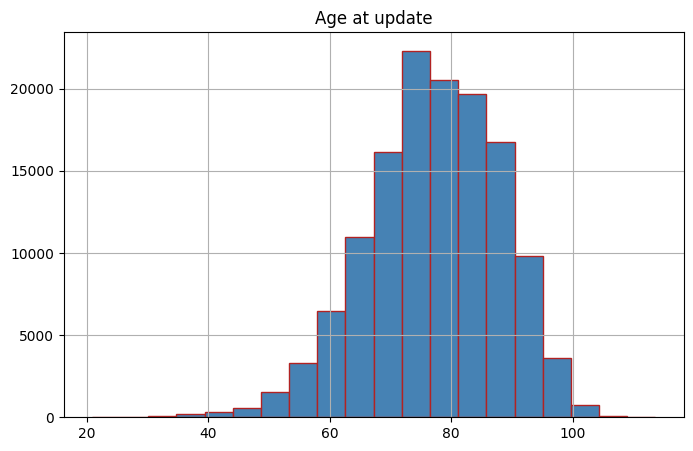

In [60]:
# Histogram for each continuous variable

continuous_varibles.hist(figsize=(8, 5), bins=20, layout=(1, 1), color='steelblue',
                                   edgecolor='firebrick', linewidth=1);

* **There are shown outliers for the age ranges of 20–50 and 100–113.Box plot will be used to test that and find outliers in the future.**

**(II) Age at update(Box plot for outlier detection)**

In [63]:
fig = px.box(continuous_varibles, y="Age at update")
fig.show()

* **Ages of less than 47 and greater than 108 have been detected as outliers in the,So before giving to the model will handle this.**

**(III) Marital status(Count plot)**

In [67]:
#Checking the values each category in marital status

# Count the occurrences of each label
Demographics_Event_train_remove_df["Marital status"].value_counts()

Married                     73020
Divorced                    26856
Widowed                     19378
Never married                9352
Separated                    3708
Unknown                       534
Not specified (no value)      286
Single                        118
Name: Marital status, dtype: int64

* **There are like 8 category we have let's plot them**

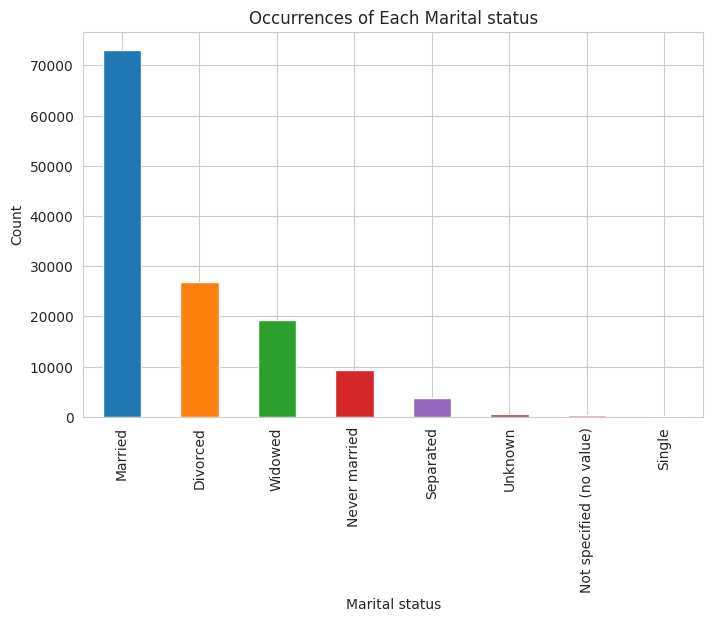

In [70]:
# Count the occurrences of each state
Marital_status_count = Demographics_Event_train_remove_df["Marital status"].value_counts()

# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]

# Bar plot with custom colors
plt.figure(figsize=(8, 5))
Marital_status_count.plot(kind="bar", color=custom_palette)
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.title("Occurrences of Each Marital status")
plt.show()

* **The percentage of "married," "divorced," and "widowed" people is high in the marital columns, while the number of "single" people is minimal.**

**(IV) Ruca category(Count plot)**

In [72]:
# Count the occurrences of each state
Ruca_category_count = Demographics_Event_train_remove_df["Ruca category"].value_counts()
print(Ruca_category_count)

Urban            84092
Rural            46614
Highly rural      2034
Not specified      512
Name: Ruca category, dtype: int64


* **There are like 4 category,let's plot them**

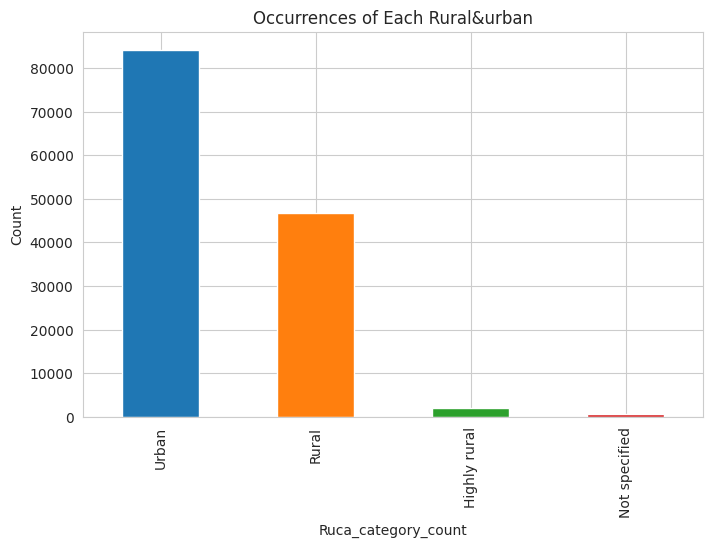

In [73]:
# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]

# Bar plot with custom colors
plt.figure(figsize=(8, 5))
Ruca_category_count.plot(kind="bar", color=custom_palette)
plt.xlabel("Ruca_category_count")
plt.ylabel("Count")
plt.title("Occurrences of Each Rural&urban")
plt.show()

* **According to this data, the majority of patients come from "Urban" and "Rural" areas, with fewer coming from "Highly rural" areas.** 

#**Bivariate analysis(Finding the relationship between the varibles)**

# **Question:**

* How can i handle the date-time columns?

* how can i handle the outliers?